In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(X_train.min(),X_train.max(), X_test.min(), X_test.max())
X_train = X_train.astype('float64') / 255.0
X_test = X_test.astype('float64') / 255.0
print(X_train.min(),X_train.max(), X_test.min(), X_test.max())

0 255 0 255
0.0 1.0 0.0 1.0


In [5]:
print(y_train[0],y_test[0])
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train[0],y_test[0])

5 7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 32)        

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=512,epochs=10,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/10
118/118 [==============================] - 13s 109ms/step - loss: 0.6642 - accuracy: 0.7941 - val_loss: 0.1989 - val_accuracy: 0.9371
Epoch 2/10
118/118 [==============================] - 13s 110ms/step - loss: 0.1643 - accuracy: 0.9503 - val_loss: 0.1175 - val_accuracy: 0.9641
Epoch 3/10
118/118 [==============================] - 12s 106ms/step - loss: 0.1158 - accuracy: 0.9645 - val_loss: 0.1003 - val_accuracy: 0.9706
Epoch 4/10
118/118 [==============================] - 13s 108ms/step - loss: 0.0951 - accuracy: 0.9711 - val_loss: 0.0795 - val_accuracy: 0.9751
Epoch 5/10
118/118 [==============================] - 13s 111ms/step - loss: 0.0808 - accuracy: 0.9753 - val_loss: 0.0710 - val_accuracy: 0.9784
Epoch 6/10
118/118 [==============================] - 13s 112ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0804 - val_accuracy: 0.9748
Epoch 7/10
118/118 [==============================] - 13s 111ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0699 - val_ac

In [17]:
model.save('mnist2.h5')

In [20]:
from keras.models import save_model , load_model

In [21]:
model2 = load_model('mnist2.h5')

In [22]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 32)        

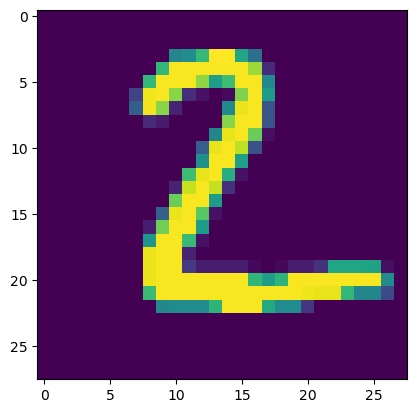

In [44]:
plt.imshow(X_test[1])

In [52]:
np.argmax(model.predict(X_test[1:2]))

1/1 [==============================] - 0s 16ms/step


2

In [53]:
X_test[1:2].shape

(1, 28, 28, 1)